In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("bestsellers with categories.csv")
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
dataset_authors = dataset["Author"]
dataset_users_ratings = dataset["User Rating"]
dataset_reviews = dataset["Reviews"]
dataset_prices = dataset["Price"]
dataset_years = dataset["Year"]
dataset_genres = dataset["Genre"]

In [4]:
dataset.shape

(550, 7)

# I. Univariate Analysis

## 1. Users Ratings | Reviews

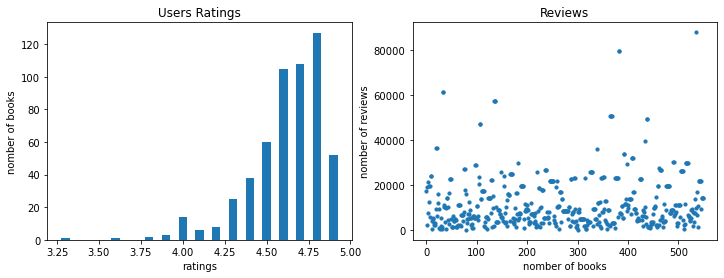

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(dataset_users_ratings.value_counts().keys(), dataset_users_ratings.value_counts().values, width=0.05)
ax1.title.set_text("Users Ratings")
ax1.set_xlabel("ratings")
ax1.set_ylabel("nomber of books")

ax2.scatter(dataset_reviews.keys(), dataset_reviews.values, s=10)
ax2.title.set_text("Reviews")
ax2.set_xlabel("nomber of books")
ax2.set_ylabel("nomber of reviews")

fig.show()

In [6]:
print("Minimum rating: " + str(np.amin(dataset_users_ratings)))
print("Maximum rating: " + str(np.amax(dataset_users_ratings)))

Minimum rating: 3.3
Maximum rating: 4.9


In [7]:
print("Minimum review: " + str(np.amin(dataset_reviews)))
print("Maximum review: " + str(np.amax(dataset_reviews)))
print("Number of review's peak: " + str(dataset_reviews.loc[dataset_reviews > 40000].shape[0]))

Minimum review: 37
Maximum review: 87841
Number of review's peak: 16


## 2. Prices | Years

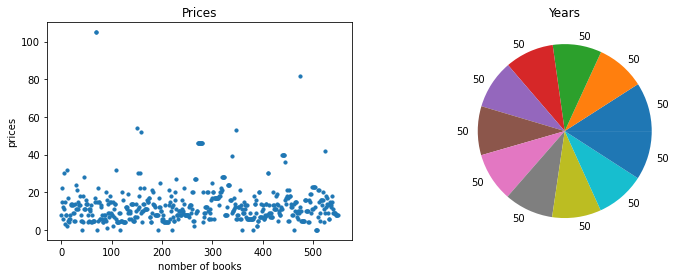

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(dataset_prices.keys(), dataset_prices.values, s=10)
ax1.title.set_text("Prices")
ax1.set_xlabel("nomber of books")
ax1.set_ylabel("prices")

ax2.pie(dataset_years.value_counts().keys(), labels=dataset_years.value_counts().values)
ax2.title.set_text("Years")

fig.show()

In [9]:
print("Minimum price: " + str(np.amin(dataset_prices)))
print("Maximum price: " + str(np.amax(dataset_prices)))
print("Number of price's peak: " + str(dataset_prices.loc[dataset_prices > 40].shape[0]))

Minimum price: 0
Maximum price: 105
Number of price's peak: 17


## 3. Authors | Genres

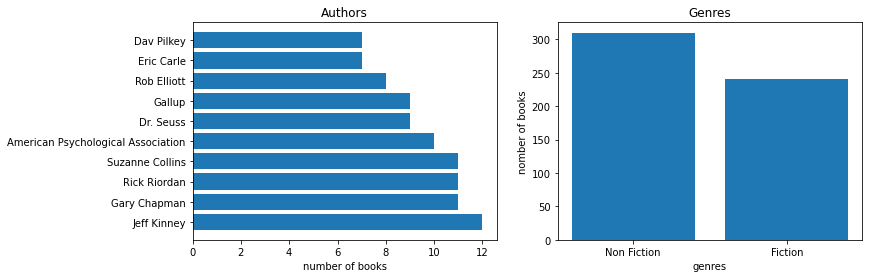

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.barh(dataset_authors.value_counts().head(10).keys(), dataset_authors.value_counts().head(10).values)
ax1.title.set_text("Authors")
ax1.set_xlabel("number of books")

ax2.bar(dataset_genres.value_counts().keys(), dataset_genres.value_counts().values)
ax2.title.set_text("Genres")
ax2.set_xlabel("genres")
ax2.set_ylabel("nomber of books")

fig.show()

# II. Bivariate Analysis

## 1. Authors ∈ Prices | Genres ∈ Prices

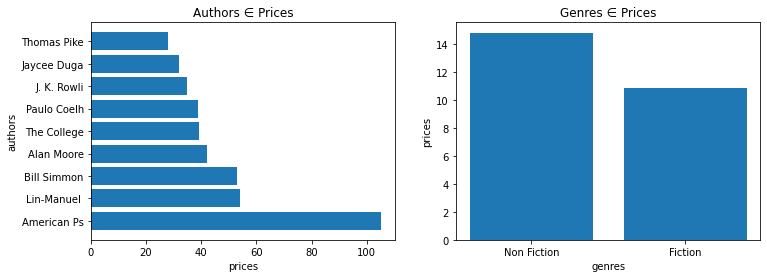

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dataset_authors_prices = dataset_authors.value_counts().keys().to_numpy().reshape(248, 1)

def calculate_author_price(x):
    return np.array([x[0], dataset.loc[dataset['Author'] == x[0]]['Price'].mean()])

dataset_authors_prices = pd.DataFrame(np.apply_along_axis(calculate_author_price, arr=dataset_authors_prices, axis=1))
dataset_authors_prices[1] = dataset_authors_prices[1].astype(np.float)
dataset_authors_prices = dataset_authors_prices.sort_values(by=[1], ascending=False)

ax1.barh(dataset_authors_prices.head(10)[0], dataset_authors_prices.head(10)[1])
ax1.title.set_text("Authors ∈ Prices")
ax1.set_xlabel("prices")
ax1.set_ylabel("authors")

dataset_genre_prices = dataset_genres.value_counts().keys().to_numpy().reshape(2, 1)

def calculate_genre_price(x):
    return np.array([x[0], dataset.loc[dataset['Genre'] == x[0]]['Price'].mean()])

dataset_genre_prices = pd.DataFrame(np.apply_along_axis(calculate_genre_price, arr=dataset_genre_prices, axis=1))
dataset_genre_prices[1] = dataset_genre_prices[1].astype(np.float)
dataset_genre_prices = dataset_genre_prices.sort_values(by=[1], ascending=False)

ax2.bar(dataset_genre_prices[0], dataset_genre_prices[1])
ax2.title.set_text("Genres ∈ Prices")
ax2.set_xlabel("genres")
ax2.set_ylabel("prices")

fig.show()

In [12]:
dataset_authors_prices.head(1)

,0,1
61,American Ps,105.0


## 2. Users Ratings ∈ Prices | Reviews ∈ Prices | Years ∈ Prices

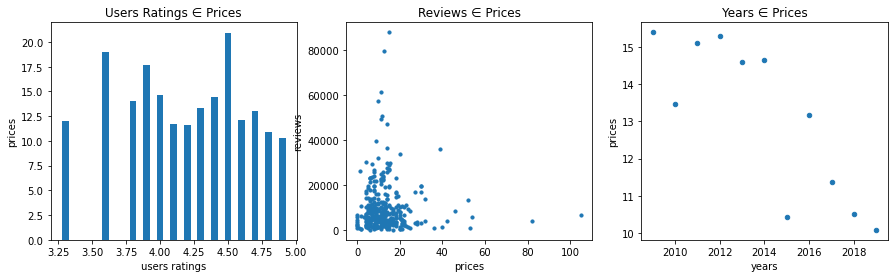

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

dataset_users_ratings_prices = dataset_users_ratings.value_counts().keys().to_numpy().reshape(14, 1)

def calculate_user_rating_price(x):
    return np.array([x[0], dataset.loc[dataset['User Rating'] == x[0]]['Price'].mean()])

dataset_users_ratings_prices = pd.DataFrame(np.apply_along_axis(calculate_user_rating_price, arr=dataset_users_ratings_prices, axis=1))
dataset_users_ratings_prices[1] = dataset_users_ratings_prices[1].astype(np.float)
dataset_users_ratings_prices = dataset_users_ratings_prices.sort_values(by=[1], ascending=False)

ax1.bar(dataset_users_ratings_prices[0], dataset_users_ratings_prices[1], width=0.05)
ax1.title.set_text("Users Ratings ∈ Prices")
ax1.set_xlabel("users ratings")
ax1.set_ylabel("prices")

dataset_reviews_prices = dataset_reviews.value_counts().keys().to_numpy().reshape(346, 1)

def calculate_reviews_price(x):
    return np.array([x[0], dataset.loc[dataset['Reviews'] == x[0]]['Price'].mean()])

dataset_reviews_prices = pd.DataFrame(np.apply_along_axis(calculate_reviews_price, arr=dataset_reviews_prices, axis=1))
dataset_reviews_prices[1] = dataset_reviews_prices[1].astype(np.float)
dataset_reviews_prices = dataset_reviews_prices.sort_values(by=[0], ascending=False)

ax2.scatter(dataset_reviews_prices[1], dataset_reviews_prices[0], s=10)
ax2.title.set_text("Reviews ∈ Prices")
ax2.set_xlabel("prices")
ax2.set_ylabel("reviews")

dataset_years_prices = dataset_years.value_counts().keys().to_numpy().reshape(11, 1)

def calculate_year_price(x):
    return np.array([x[0], dataset.loc[dataset['Year'] == x[0]]['Price'].mean()])

dataset_years_prices = pd.DataFrame(np.apply_along_axis(calculate_year_price, arr=dataset_years_prices, axis=1))
dataset_years_prices[1] = dataset_years_prices[1].astype(np.float)
dataset_years_prices = dataset_years_prices.sort_values(by=[0], ascending=False)

ax3.scatter(dataset_years_prices[0], dataset_years_prices[1], s=20)
ax3.title.set_text("Years ∈ Prices")
ax3.set_xlabel("years")
ax3.set_ylabel("prices")

fig.show()

In [14]:
dataset_users_ratings_prices.loc[dataset_users_ratings_prices[1] > 17.5]

,0,1
3,4.5,20.933333
13,3.6,19.000000
10,3.9,17.666667


In [15]:
dataset_reviews_prices.loc[dataset_reviews_prices[1] > 45]

,0,1
251,13471.0,52.0
0,8580.0,46.0
77,6679.0,105.0
151,5867.0,54.0
118,3801.0,82.0
174,858.0,53.0


## 3. Users Ratings ∈ Reviews | Years ∈ Reviews

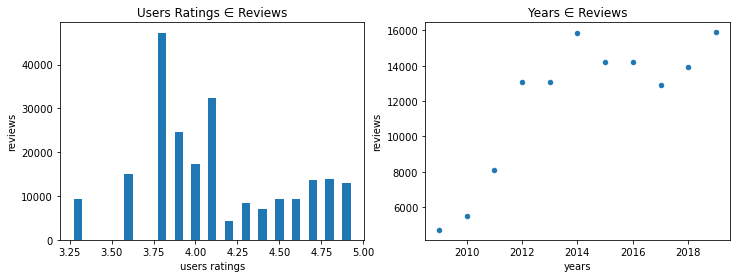

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dataset_users_ratings_reviews = dataset_users_ratings.value_counts().keys().to_numpy().reshape(14, 1)

def calculate_user_rating_reviews(x):
    return np.array([x[0], dataset.loc[dataset['User Rating'] == x[0]]['Reviews'].mean()])

dataset_users_ratings_reviews = pd.DataFrame(np.apply_along_axis(calculate_user_rating_reviews, arr=dataset_users_ratings_reviews, axis=1))
dataset_users_ratings_reviews[1] = dataset_users_ratings_reviews[1].astype(np.float)
dataset_users_ratings_reviews = dataset_users_ratings_reviews.sort_values(by=[1], ascending=False)

ax1.bar(dataset_users_ratings_reviews[0], dataset_users_ratings_reviews[1], width=0.05)
ax1.title.set_text("Users Ratings ∈ Reviews")
ax1.set_xlabel("users ratings")
ax1.set_ylabel("reviews")

dataset_years_reviews = dataset_years.value_counts().keys().to_numpy().reshape(11, 1)

def calculate_years_reviews(x):
    return np.array([x[0], dataset.loc[dataset['Year'] == x[0]]['Reviews'].mean()])

dataset_years_reviews = pd.DataFrame(np.apply_along_axis(calculate_years_reviews, arr=dataset_years_reviews, axis=1))
dataset_years_reviews[1] = dataset_years_reviews[1].astype(np.float)
dataset_years_reviews = dataset_years_reviews.sort_values(by=[0], ascending=False)

ax2.scatter(dataset_years_reviews[0], dataset_years_reviews[1], s=20)
ax2.title.set_text("Years ∈ Reviews")
ax2.set_xlabel("years")
ax2.set_ylabel("reviews")

fig.show()

In [17]:
dataset_users_ratings_reviews.head(1)

,0,1
11,3.8,47265.0
